# Titanic Survival Prediction

#### Data Preprocessing

In [19]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

In [4]:
dataset = pd.read_csv('https://raw.githubusercontent.com/codebasics/py/master/ML/14_naive_bayes/titanic.csv')
print(dataset.shape)
dataset.head()

(891, 12)


,PassengerId,Name,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Survived
0,1,"Braund, Mr. Owen Harris",3,male,22.0,1,0,A/5 21171,7.2500,NaN,S,0
1,2,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,female,38.0,1,0,PC 17599,71.2833,C85,C,1
2,3,"Heikkinen, Miss. Laina",3,female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1
3,4,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,female,35.0,1,0,113803,53.1000,C123,S,1
4,5,"Allen, Mr. William Henry",3,male,35.0,0,0,373450,8.0500,NaN,S,0


In [5]:
dataset.drop(['PassengerId', 'Name', 'SibSp', 'Parch', 'Ticket', 'Cabin', 'Embarked'], axis='columns', inplace=True)
dataset.head()

,Pclass,Sex,Age,Fare,Survived
0,3,male,22.0,7.2500,0
1,1,female,38.0,71.2833,1
2,3,female,26.0,7.9250,1
3,1,female,35.0,53.1000,1
4,3,male,35.0,8.0500,0


male      577
female    314
Name: Sex, dtype: int64


(-1.1076137555765015,
 1.1135982299814629,
 -1.1118283194882173,
 1.1093836660697471)

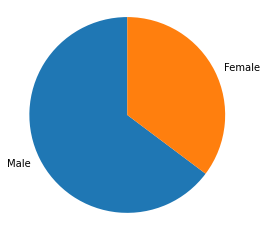

In [25]:
sex_count = dataset['Sex'].value_counts()
print(sex_count)
plt.pie(sex_count, labels=['Male', 'Female'], startangle=90)
plt.axis('square')

In [28]:
inputs = dataset.drop('Survived', axis='columns')
target = dataset.Survived
inputs.head()

,Pclass,Sex,Age,Fare
0,3,male,22.0,7.2500
1,1,female,38.0,71.2833
2,3,female,26.0,7.9250
3,1,female,35.0,53.1000
4,3,male,35.0,8.0500


In [43]:
dummies = pd.get_dummies(inputs.Sex)
dummies

,female,male
0,0,1
1,1,0
2,1,0
3,1,0
4,0,1
...,...,...
886,0,1
887,1,0
888,1,0
889,0,1


In [44]:
inputs = pd.concat([inputs, dummies], axis='columns')
inputs.head()

,Pclass,Sex,Age,Fare,female,male
0,3,male,22.0,7.2500,0,1
1,1,female,38.0,71.2833,1,0
2,3,female,26.0,7.9250,1,0
3,1,female,35.0,53.1000,1,0
4,3,male,35.0,8.0500,0,1


In [45]:
inputs.drop(['Sex', 'male'], axis='columns', inplace=True)
inputs.head()

,Pclass,Age,Fare,female
0,3,22.0,7.2500,0
1,1,38.0,71.2833,1
2,3,26.0,7.9250,1
3,1,35.0,53.1000,1
4,3,35.0,8.0500,0


In [46]:
inputs.columns[inputs.isna().any()]

Index(['Age'], dtype='object')

In [47]:
inputs.Age[:10]

0    22.0
1    38.0
2    26.0
3    35.0
4    35.0
5     NaN
6    54.0
7     2.0
8    27.0
9    14.0
Name: Age, dtype: float64

In [48]:
inputs.Age = inputs.Age.fillna(inputs.Age.mean())
inputs.head()

,Pclass,Age,Fare,female
0,3,22.0,7.2500,0
1,1,38.0,71.2833,1
2,3,26.0,7.9250,1
3,1,35.0,53.1000,1
4,3,35.0,8.0500,0


#### Modelling

In [49]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(inputs, target, test_size=0.3)

In [50]:
from sklearn.naive_bayes import GaussianNB
model = GaussianNB()

In [51]:
model.fit(x_train, y_train)

GaussianNB()

In [52]:
model.score(x_test, y_test)

0.7910447761194029

In [53]:
x_test[:10]

,Pclass,Age,Fare,female
756,3,28.000000,7.7958,0
848,2,28.000000,33.0000,0
675,3,18.000000,7.7750,0
533,3,29.699118,22.3583,1
431,3,29.699118,16.1000,1
80,3,22.000000,9.0000,0
112,3,22.000000,8.0500,0
47,3,29.699118,7.7500,1
472,2,33.000000,27.7500,1
111,3,14.500000,14.4542,1


In [54]:
y_test[:10]

756    0
848    0
675    0
533    1
431    1
80     0
112    0
47     1
472    1
111    0
Name: Survived, dtype: int64

#### Prediction

In [55]:
model.predict(x_test[:10])

array([0, 0, 0, 1, 1, 0, 0, 1, 1, 1], dtype=int64)

In [56]:
model.predict_proba(x_test[:10])

array([[0.95991574, 0.04008426],
       [0.90720421, 0.09279579],
       [0.95365121, 0.04634879],
       [0.42145871, 0.57854129],
       [0.42731048, 0.57268952],
       [0.95701091, 0.04298909],
       [0.95688949, 0.04311051],
       [0.42547001, 0.57452999],
       [0.24589773, 0.75410227],
       [0.36877719, 0.63122281]])

##### Calculate the score using cross validation

In [57]:
from sklearn.model_selection import cross_val_score
cross_val_score(GaussianNB(), x_train, y_train, cv=5)

array([0.76      , 0.768     , 0.832     , 0.74193548, 0.7016129 ])